In [1]:
path_figure = r"C:\Users\coren\Documents\PhD\paper\PandC\FigS2"

import matplotlib.pyplot as plt

plt.style.use('presentation.mplstyle')

import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('data_for_figure .csv')

# Calculate the average of consecutive pairs of values in the last column
averages = []
for i in range(0, len(df)-1, 2):
    avg = (df.iloc[i, -1] + df.iloc[i+1, -1]) / 2
    averages.extend([avg, avg])

# If the number of rows is odd, add the last value to the list of averages
if len(df) % 2 != 0:
    averages.append(df.iloc[-1, -1])

# Update the last column with the calculated averages
df.iloc[:, -1] = averages

# Split the DataFrame into two separate DataFrames
first = df.iloc[:34]
second = df.iloc[34:]

# Drop duplicate rows in the second DataFrame
second = second.drop_duplicates()

first = first.drop_duplicates()
first = first.drop(6)
first.at[4,'measure'] = 10.393155

# Print the first DataFrame
print("First DataFrame:")
print(first)

# Print the second DataFrame
print("\nSecond DataFrame:")
print(second)


First DataFrame:
                       id  edge_begin  edge_end    measure
0   20230810_Plate441_089          38        76  11.148841
2   20230810_Plate441_089          80        88  15.892225
4   20230810_Plate441_089          77        71  10.393155
8   20230810_Plate441_089          40         4  14.840839
10  20230811_Plate441_147           3        30  11.359846
12  20230811_Plate441_147          31        30  14.656983
14  20230811_Plate441_147          29         0  13.312802
16  20230811_Plate441_147          29        10  10.185911
18  20230812_Plate441_101          18        50  11.697188
20  20230812_Plate441_101          51        50  16.098776
22  20230812_Plate441_101          49         0  14.180840
24  20230812_Plate441_101          49        22  10.257949
26  20230813_Plate441_018           6        48  11.599638
28  20230813_Plate441_018          59        48  16.000272
30  20230813_Plate441_018          24         0  12.159895
32  20230813_Plate441_018          20  

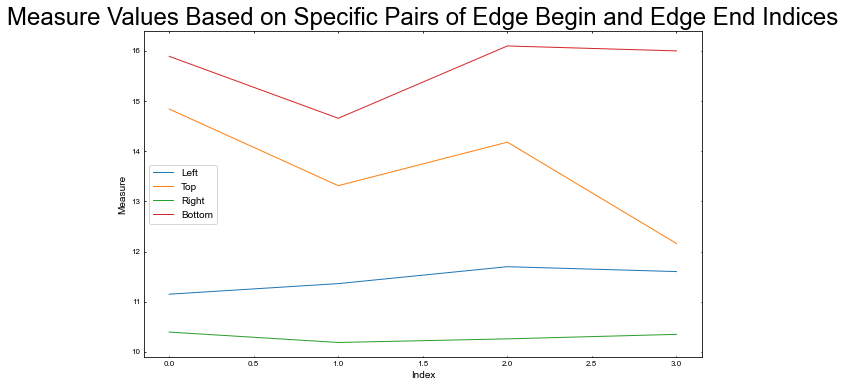

[10.393155, 10.185910768, 10.25794912, 10.347922405]


In [2]:
import matplotlib.pyplot as plt

# Define the pairs of edge_begin and edge_end indices
left = [(38, 76), (3, 30), (18, 50), (6, 48)]
top = [(40, 4), (29, 0), (49, 0), (24, 0)]
right = [(77, 71), (29, 10), (49, 22), (20, 47)]
bottom = [(80, 88), (31, 30), (51, 50), (59, 48)]

# Extract the values from the 'measure' column based on the specified indices
left_values = [first.loc[(first['edge_begin'] == begin) & (first['edge_end'] == end), 'measure'].values[0] for begin, end in left]
top_values = [first.loc[(first['edge_begin'] == begin) & (first['edge_end'] == end), 'measure'].values[0] for begin, end in top]
right_values = [first.loc[(first['edge_begin'] == begin) & (first['edge_end'] == end), 'measure'].values[0] for begin, end in right]
bottom_values = [first.loc[(first['edge_begin'] == begin) & (first['edge_end'] == end), 'measure'].values[0] for begin, end in bottom]

# Plot the values
plt.figure(figsize=(10, 6))
plt.plot(range(len(left_values)), left_values, label='Left')
plt.plot(range(len(top_values)), top_values, label='Top')
plt.plot(range(len(right_values)), right_values, label='Right')
plt.plot(range(len(bottom_values)), bottom_values, label='Bottom')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Measure')
plt.title('Measure Values Based on Specific Pairs of Edge Begin and Edge End Indices')
plt.legend()

# Show plot
plt.show()

print(right_values)

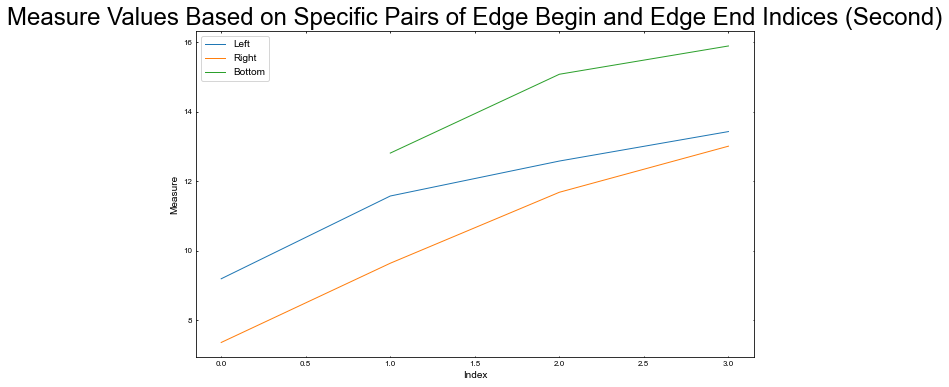

In [3]:
# Define the pairs of edge_begin and edge_end indices for each direction
left = [(42, 2), (28, 0), (0, 138), (2, 94)]
right = [(42, 9), (28, 11), (15, 138), (0, 94)]
bottom = [(None, None), (28, 49), (191, 138), (154, 94)]

# Extract the values from the 'measure' column based on the specified indices for each direction
left_values = [second.loc[(second['edge_begin'] == begin) & (second['edge_end'] == end), 'measure'].values[0] for begin, end in left]
right_values = [second.loc[(second['edge_begin'] == begin) & (second['edge_end'] == end), 'measure'].values[0] for begin, end in right]
bottom_values = [second.loc[(second['edge_begin'] == begin) & (second['edge_end'] == end), 'measure'].values[0] if begin is not None and end is not None else None for begin, end in bottom]

# Plot the values for each direction
plt.figure(figsize=(10, 6))
plt.plot(range(len(left_values)), left_values, label='Left')
plt.plot(range(len(right_values)), right_values, label='Right')
plt.plot(range(len(bottom_values)), bottom_values, label='Bottom')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Measure')
plt.title('Measure Values Based on Specific Pairs of Edge Begin and Edge End Indices (Second)')
plt.legend()

# Show plot
plt.show()




In [13]:
right_values_second

[7.352218730500001, 9.6359550975, 11.68130253, 13.00951594]

meta NOT subset; don't know how to subset; dropped


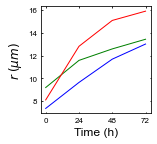

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (5*cm,5*cm))

# Define the pairs of edge_begin and edge_end indices for each direction for second DataFrame
left_second = [(42, 2), (28, 0), (0, 138), (2, 94)]
right_second = [(42, 9), (28, 11), (15, 138), (0, 94)]
bottom_second = [(None, None), (28, 49), (191, 138), (154, 94)]

# Extract the values from the 'measure' column based on the specified indices for each direction for second DataFrame
left_values_second = [second.loc[(second['edge_begin'] == begin) & (second['edge_end'] == end), 'measure'].values[0] for begin, end in left_second]
right_values_second = [second.loc[(second['edge_begin'] == begin) & (second['edge_end'] == end), 'measure'].values[0] for begin, end in right_second]
bottom_values_second = [second.loc[(second['edge_begin'] == begin) & (second['edge_end'] == end), 'measure'].values[0] if begin is not None and end is not None else np.nan for begin, end in bottom_second]
bottom_values_second[0] = 8.1
# Calculate the average of all three directions at each data point for second DataFrame
average_values_second = np.nanmean([left_values_second, right_values_second, bottom_values_second], axis=0)/2
std_dev_values_second = np.nanstd([left_values_second, right_values_second, bottom_values_second], axis=0)/2

# Plot the average line for second DataFrame
# ax.plot(range(len(average_values_second)), average_values_second, color='red')

# # Plot the shaded region representing the standard deviation for second DataFrame
# ax.fill_between(range(len(average_values_second)),
#                  average_values_second - std_dev_values_second,
#                  average_values_second + std_dev_values_second,
#                  color='red', alpha=0.2)
ax.plot(range(len(left_values)), left_values_second, color="green")
ax.plot(range(len(right_values)), right_values_second, color="blue")
ax.plot(range(len(bottom_values)), bottom_values_second, color="red")

# Calculate the number of data points per 24 hours
data_points_per_24h = len(average_values_second) // 3

# Adjust x-axis ticks
ax.set_xticks([0, data_points_per_24h, 2 * data_points_per_24h, len(average_values_second) - 1],
           ['0', '24', '48', '72'])

# Adjust plot style and labels for publication
ax.set_xlabel('Time (h)', fontsize=12)
ax.set_ylabel('$r$ $(\mu m)$', fontsize=12)
plt.savefig(os.path.join(path_figure,'FigureS2A.pdf'), transparent=True, bbox_inches='tight')

